# Story 4 ("How much do we get paid?")

I have introduced the term "Data Practitioner" as a generic job descriptor because we have so many different job role titles for individuals whose work activities overlap including Data Scientist, Data Engineer, Data Analyst, Business Analyst, Data Architect, etc.
For this story we will answer the question, "How much do we get paid?" Your analysis and data visualizations must address the variation in average salary based on role descriptor and state.

In [1]:
# For the following story I will use pandas to clean and wrangle the data and I will use matplotlib library to visualize the library.

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/CUNY-SPS-Data-Science-Program/your-bio-AldataSci/main/Story4/ds_salaries.csv')



In [2]:
## There are 607 observataions and 12 rows within the dataset..
df.shape

(607, 12)

In [3]:
df.head(10)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [4]:
# We have various columns about experience levels,employment_type, job_title, salary, company_location and etc..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
## The story should focus on the various salaries by various data titles.. let's focus on the United States for now, since I am interested in The U.S (for now..)

## Let me focus on salaries of full time employment and salary_currency in USD
us_df = df[df['employment_type'] == 'FT']

us_dfm = us_df[us_df['salary_currency'] == 'USD']

us_dfm

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [6]:
## Let's take a look at the unique job titles in this set. There are so many titles in this job, is it wise to plot this many on a plot..?

us_dfm['job_title'].unique()

array(['Machine Learning Scientist', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'BI Data Analyst', 'Director of Data Science',
       'Research Scientist', 'Big Data Engineer',
       'Data Science Consultant', 'Data Scientist', 'Data Engineer',
       'Data Science Manager', 'Head of Data', 'Data Analytics Engineer',
       'Financial Data Analyst', 'Computer Vision Software Engineer',
       'Principal Data Engineer', 'Principal Data Scientist',
       'Machine Learning Developer', 'Applied Machine Learning Scientist',
       'Computer Vision Engineer', 'Data Engineering Manager',
       'Cloud Data Engineer', 'Data Analytics Manager',
       'Head of Data Science', 'Data Specialist', 'Data Architect',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'Director of Data Engineering', 'Principal Data Analyst',
       'AI Scient

In [7]:
us_dfm['company_location'].unique()

array(['JP', 'HN', 'US', 'NZ', 'PK', 'AE', 'NL', 'NG', 'RO', 'IN', 'IQ',
       'BR', 'UA', 'RU', 'IR', 'GB', 'FR', 'CO', 'MD', 'KE', 'CA', 'VN',
       'DE', 'ES', 'CN', 'CZ', 'MX', 'MY', 'AU', 'LU', 'GR'], dtype=object)

In [8]:
## Let's change the names of the countries to their ful names:

## Create a dictonary to map initals to their full names
full_name = {
    'JP': 'Japan',
    'HN': 'Honduras',
    'US': 'United States',
    'NZ': 'New Zealand',
    'BR': 'Brazil',
    'PK': 'Pakistan',
    'AE': 'Afghanistan',
    'NL': 'Netherlands',
    'NG': 'Nigeria',
    'RO': 'Romania',
    'IN': 'India',
    'IQ': 'Iraq',
    'UA': 'Ukraine',
    'RU': 'Russian Federation',
    'IR': 'Iran',
    'GB': 'United Kingdom',
    'FR': 'France',
    'CO': 'Colombia',
    'MD': 'Moldova',
    'KE': 'Kenya',
    'CA': 'Canada',
    'VN': 'Vietnam',
    'DE': 'Germany',
    'ES': 'Spain',
    'CN': 'China',
    'CZ': 'Czech Republic',
    'MX': 'Mexico',
    'MY': 'Malaysia',
    'AU': 'Australia',
    'LU': 'Luxembourg',
    'GR': 'Greece'
}

## Replace the ISO country code with full names

us_dfm['company_location'] = us_dfm['company_location'].replace(full_name)

us_dfm

<ipython-input-8-1dc191645017>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_dfm['company_location'] = us_dfm['company_location'].replace(full_name)


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,Japan,S
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,Honduras,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,United States,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,United States,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,United States,S
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,United States,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,United States,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,United States,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,United States,M


In [9]:
## Let's make it even better visualization of a bar plot.. I have to reorder it by salary, give it an acessible color, add values for each bar, space out each title and give it a kicker
salary_df = us_dfm.groupby('job_title').mean('salary_in_usd')['salary']

salary_df = salary_df.reset_index()

salary_df = pd.DataFrame(salary_df)

salary_df = salary_df.sort_values(by = 'salary',ascending = True)







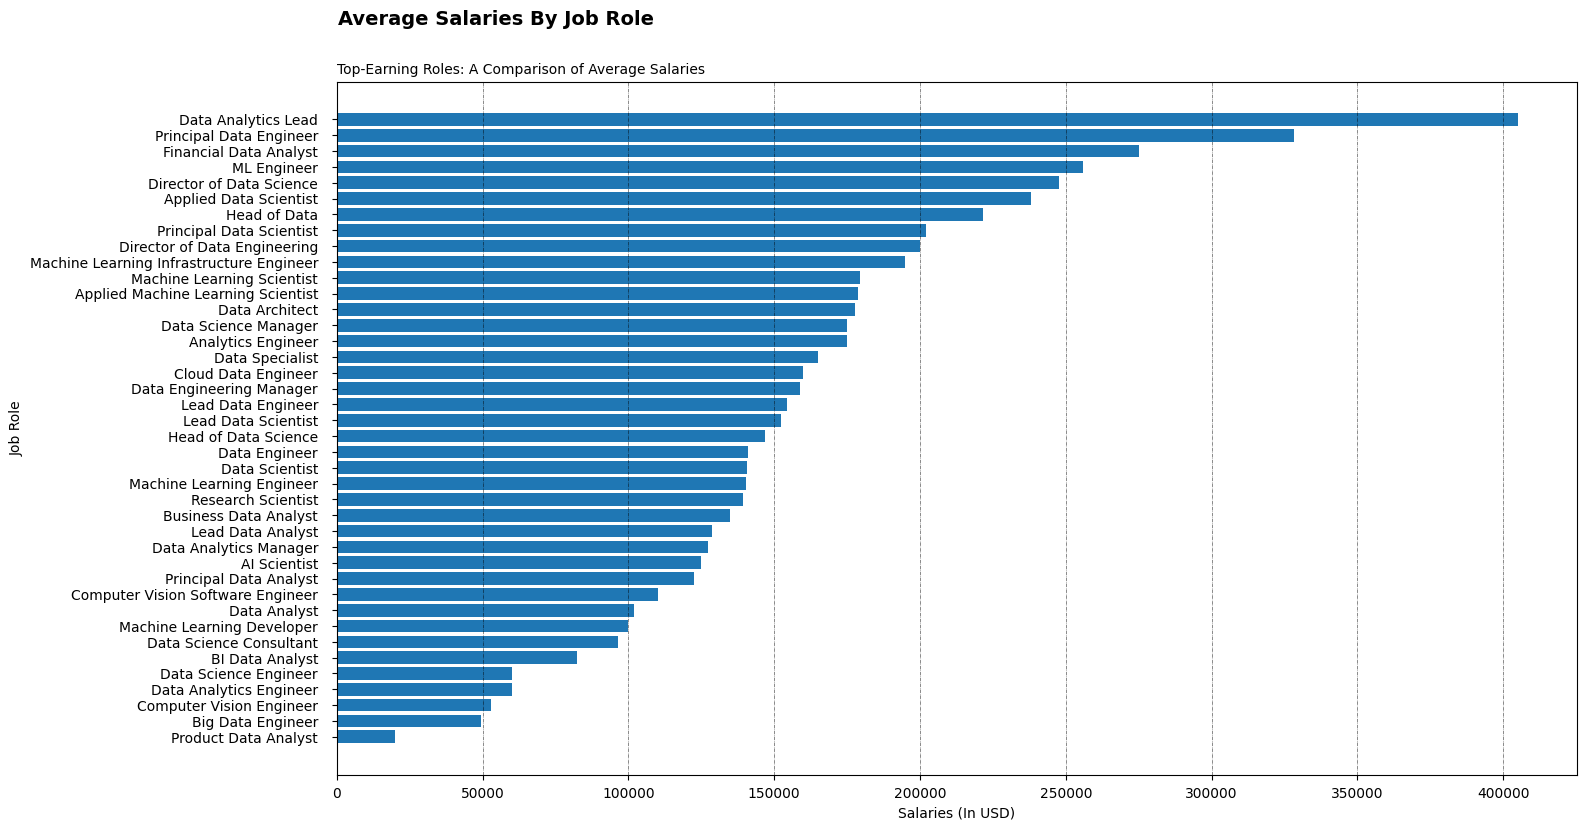

In [19]:
## I apparently don't need to add a grid-line?

fig,ax = plt.subplots(figsize=(16, 9))

ax.barh(salary_df['job_title'],salary_df['salary'])
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

## add the line grid (should check on how a grid should be displayed..)
ax.grid(color='black',axis = 'x',
        linestyle='-.', linewidth=0.4,
        alpha=0.8)


## Set the title and the caption
plt.suptitle('Average Salaries By Job Role', ha = 'left', x = 0.126, y = 0.96, fontsize = 14, fontweight = 'bold')
ax.set_title('Top-Earning Roles: A Comparison of Average Salaries',
             loc='left',fontsize = 10 )

plt.xlabel('Salaries (In USD)')
plt.ylabel('Job Role')
plt.show()

In [11]:
## Average Salary By Country?

us_dfm['company_location'].unique()

state_df = us_dfm.groupby(['job_title','company_location']).mean('salary')['salary']

state_df = state_df.reset_index()

State_df = state_df.groupby('company_location').mean('salary').sort_values(by = 'salary')

State_df = pd.DataFrame(State_df).reset_index()

State_df.head(5)


,company_location,salary
0,Vietnam,4000.0
1,Iran,4000.0
2,Kenya,9272.0
3,Luxembourg,10000.0
4,Ukraine,13400.0


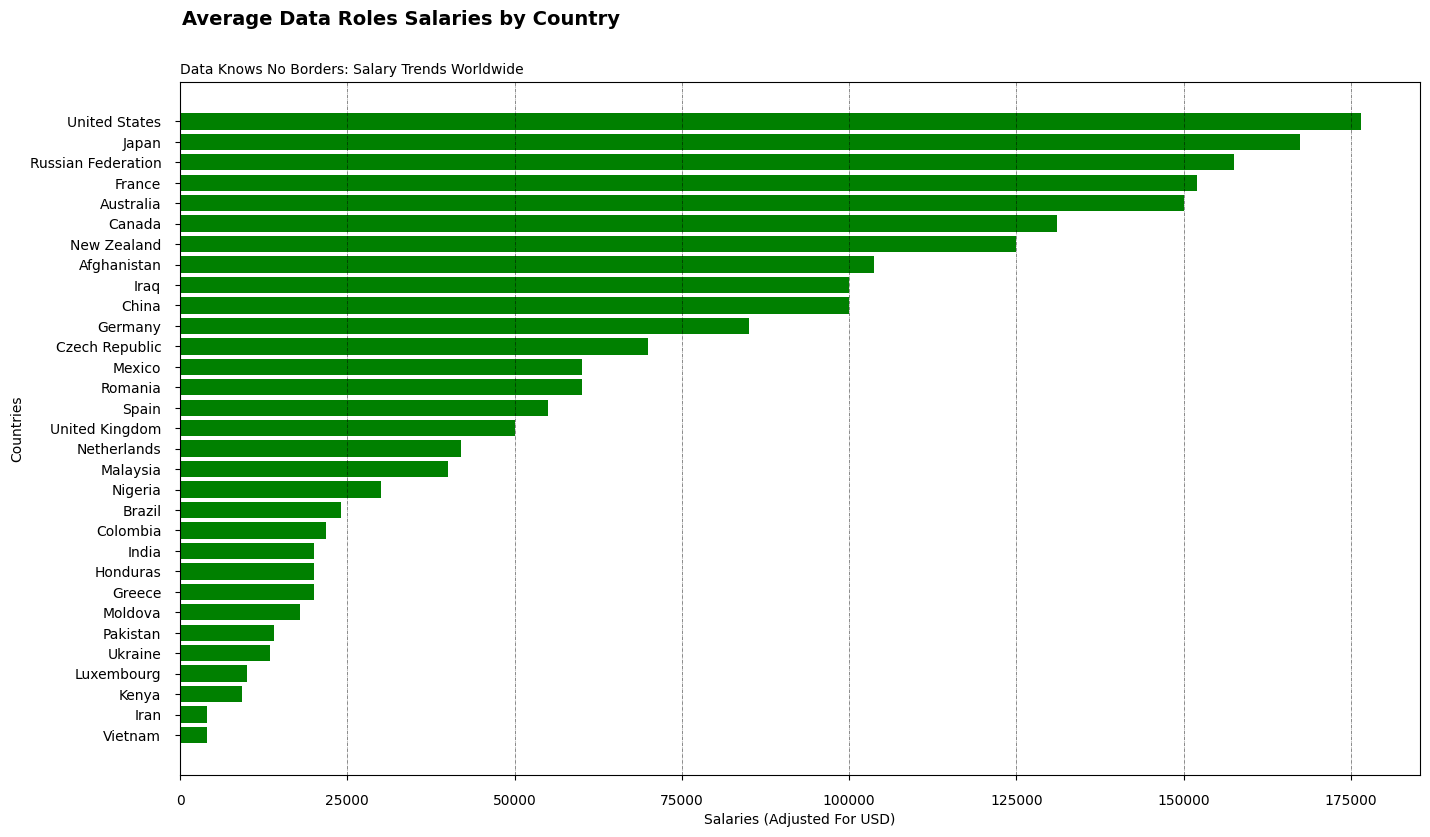

In [20]:
fig,ax = plt.subplots(figsize=(16, 9))


#colors = ['gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','gray','red']

ax.barh(State_df['company_location'],State_df['salary'], color = 'green')
ax.xaxis.set_tick_params(pad=10)
ax.yaxis.set_tick_params(pad=10)

## add the line grid (should ch,eck on how a grid should be displayed..)
ax.grid(color='black',axis = 'x',
        linestyle='-.', linewidth=0.4,
        alpha=0.8)


plt.suptitle('Average Data Roles Salaries by Country', ha = 'left', x = 0.126, y = 0.96, fontsize = 14, fontweight = 'bold')
ax.set_title('Data Knows No Borders: Salary Trends Worldwide',
             loc='left',fontsize = 10 )
plt.xlabel('Salaries (Adjusted For USD)')
plt.ylabel('Countries')
plt.show()

In [15]:
## Let's rename the experience level by their full name so users can understand.. when we create our boxplot..

levels = {
    'EN': 'Entry Level',
    'EX': 'Expert Level',
    'SE': 'Senior Level',
    'MI': 'Mid Level'
}

us_dfm['experience_level'] = us_dfm['experience_level'].replace(levels)

us_dfm.head(5)


<ipython-input-15-390a14d73fee>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_dfm['experience_level'] = us_dfm['experience_level'].replace(levels)


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,1,2020,Senior Level,FT,Machine Learning Scientist,260000,USD,260000,JP,0,Japan,S
3,3,2020,Mid Level,FT,Product Data Analyst,20000,USD,20000,HN,0,Honduras,S
4,4,2020,Senior Level,FT,Machine Learning Engineer,150000,USD,150000,US,50,United States,L
5,5,2020,Entry Level,FT,Data Analyst,72000,USD,72000,US,100,United States,L
6,6,2020,Senior Level,FT,Lead Data Scientist,190000,USD,190000,US,100,United States,S


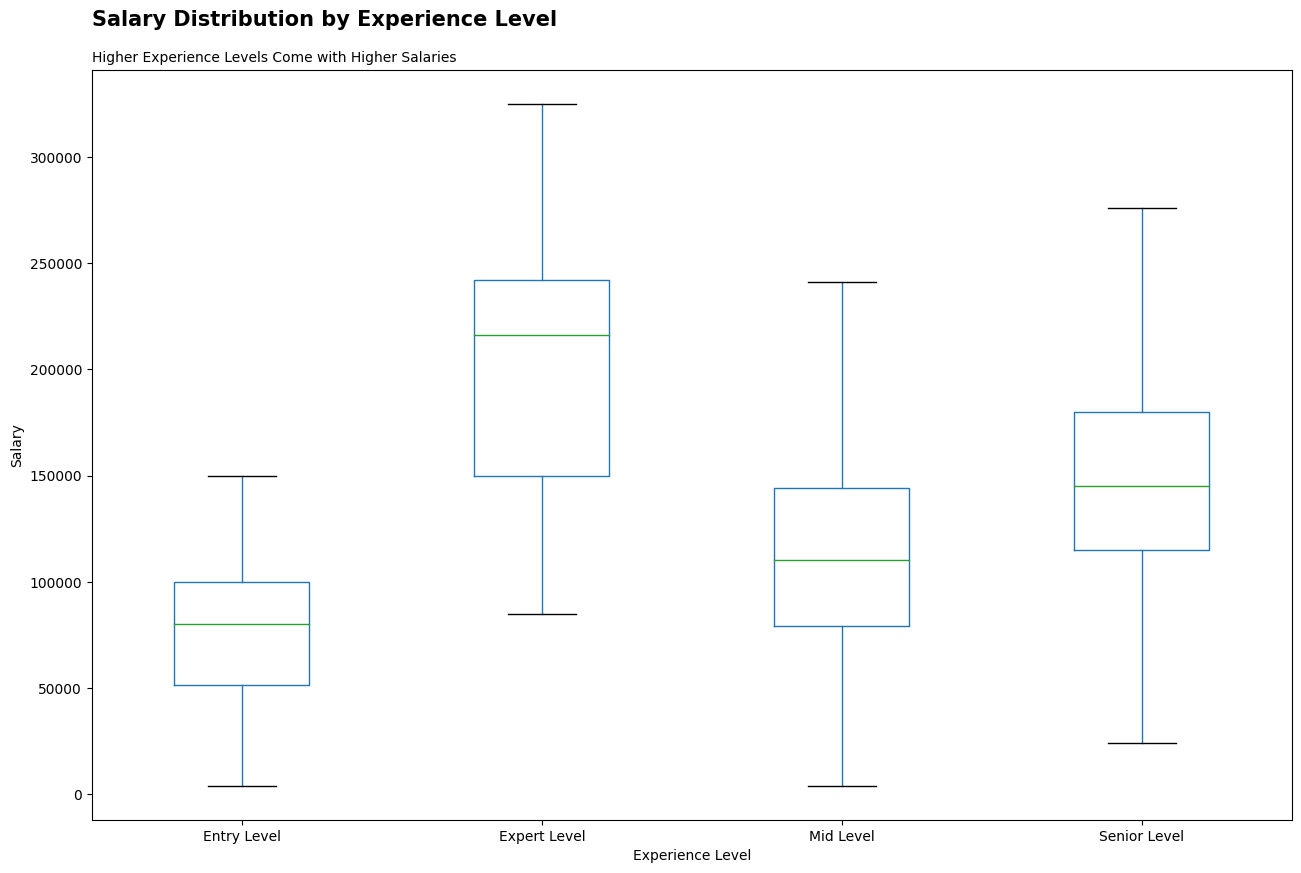

In [16]:
## Creating a Box-plot to show salary distribution by experience level..

Us_dfm = us_dfm.sort_values(by = 'experience_level')


fig = Us_dfm.boxplot(column='salary', by='experience_level', showfliers=False, grid=False,showmeans = False)
fig.set_title('') ## Clears the title



plt.title('Higher Experience Levels Come with Higher Salaries',loc='left',fontsize = 10)
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.suptitle('Salary Distribution by Experience Level', ha = 'left', x = 0.10, y = 0.96, fontsize = 15, fontweight = 'bold')
plt.gcf().set_size_inches(15, 10)

plt.show()